# Conversão e Visualização de Imagens (TIFF / RAW)

Este projeto em Python realiza a **redução de dimensionalidade** de imagens por meio da conversão de imagens coloridas para **tons de cinza (grayscale)** e posteriormente para **imagens binarizadas (preto e branco)**.

Ele foi projetado para trabalhar com imagens nos formatos **TIFF** (formato amplamente utilizado) e **RAW** (formato bruto de pixels).

---

## 🧠 Funcionalidades

- ✅ Leitura de imagens nos formatos **TIFF** ou **RAW**
- 🎨 Conversão para **escala de cinza**
- ⚫⚪ Binarização da imagem (0 e 255) com limiar fixo
- 🖼️ Exibição lado a lado:
  - Imagem original
  - Imagem em tons de cinza
  - Imagem binarizada
- 🏷️ Título da imagem original exibe dinamicamente o **formato da imagem**

---

## 📁 Estrutura do Projeto

projeto-imagem/

│

├── lena_color.tiff # Config. de imagem TIFF (Lena, 24 bit color, tiff)

├── lena_gray.raw   # Config. de imagem RAW (Lena, 8 bit gray (512 x 512), raw)

├── processa_imagem.py # Script principal Python

└── README.md

In [5]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# --- CONFIGURAÇÕES ---
# Caminho da imagem de entrada
formato = 'tiff'  # Altere para 'raw' se necessário
entrada = 'lena_color.tiff'  # ou 'lena.raw'

# Para arquivos RAW, você deve saber:
largura = 512
altura = 512
modo = 'L'  # 'L' para grayscale, 'RGB' para colorido

In [7]:
# --- ABERTURA DA IMAGEM ---
if formato == 'tiff':
    imagem_pil = Image.open(entrada)
elif formato == 'raw':
    with open(entrada, 'rb') as f:
        raw_data = f.read()
    imagem_np = np.frombuffer(raw_data, dtype=np.uint8)
    if modo == 'RGB':
        imagem_np = imagem_np.reshape((altura, largura, 3))
    else:
        imagem_np = imagem_np.reshape((altura, largura))
    imagem_pil = Image.fromarray(imagem_np, mode=modo)
else:
    raise Exception("Formato não suportado.")

In [8]:
# --- CONVERSÃO PARA CINZA ---
imagem_cinza = imagem_pil.convert('L')  # Grayscale

# --- BINARIZAÇÃO ---
limiar = 127
imagem_bin = imagem_cinza.point(lambda x: 255 if x >= limiar else 0)


In [9]:
# --- SALVANDO OS RESULTADOS ---
imagem_cinza.save('lena_cinza.png')
imagem_bin.save('lena_binaria.png')

print("Imagens geradas: lena_cinza.png e lena_binaria.png")

Imagens geradas: lena_cinza.png e lena_binaria.png


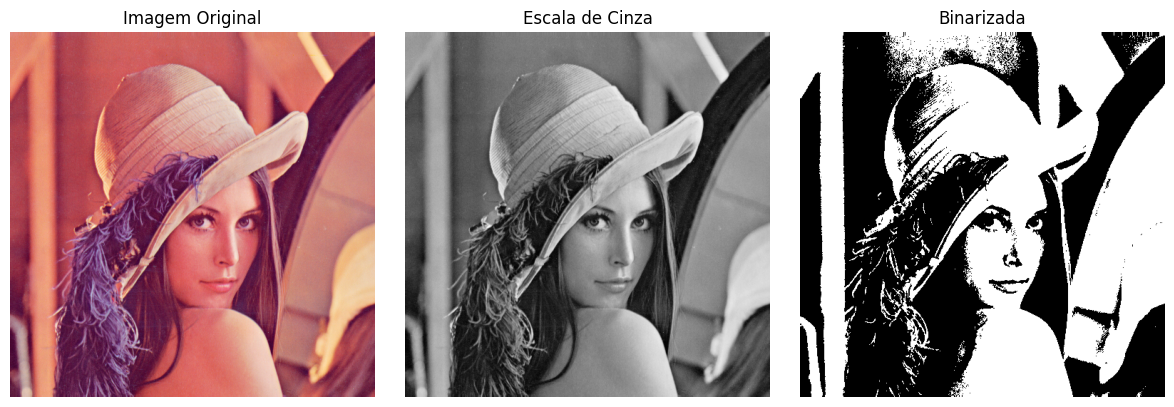

In [13]:
# --- PLOTANDO AS IMAGENS ---
plt.figure(figsize=(12, 4))

# Imagem original
plt.subplot(1, 3, 1)
plt.imshow(imagem_pil)
plt.title("Imagem Original")
plt.axis('off')

# Imagem em tons de cinza
plt.subplot(1, 3, 2)
plt.imshow(imagem_cinza, cmap='gray')
plt.title("Escala de Cinza")
plt.axis('off')

# Imagem binarizada
plt.subplot(1, 3, 3)
plt.imshow(imagem_bin, cmap='gray')
plt.title("Binarizada")
plt.axis('off')

plt.tight_layout()
plt.show()

# 🔍 Projeto de Conversão de Imagens TIFF/RAW para Escala de Cinza e Binarização

Este projeto implementa, com **uso mínimo de bibliotecas**, um processo de **redução de dimensionalidade** de imagens, transformando-as em:

- Imagem original
- Imagem em **tons de cinza** (0 a 255)
- Imagem **binarizada** (preto e branco, 0 ou 255)

É uma versão simplificada, **sem uso de bibliotecas de processamento de imagem complexas como OpenCV, NumPy ou imageio**. Apenas `Pillow` (para manipulação básica de imagem) e `matplotlib` (para visualização) são utilizados.

---

## ✅ Funcionalidades

- Leitura de imagens no formato **TIFF** ou **RAW**
- Conversão para **escala de cinza**
- Binarização com limiar fixo (`127`)
- Exibição gráfica com `matplotlib`
- Título dinâmico indicando o formato da imagem original



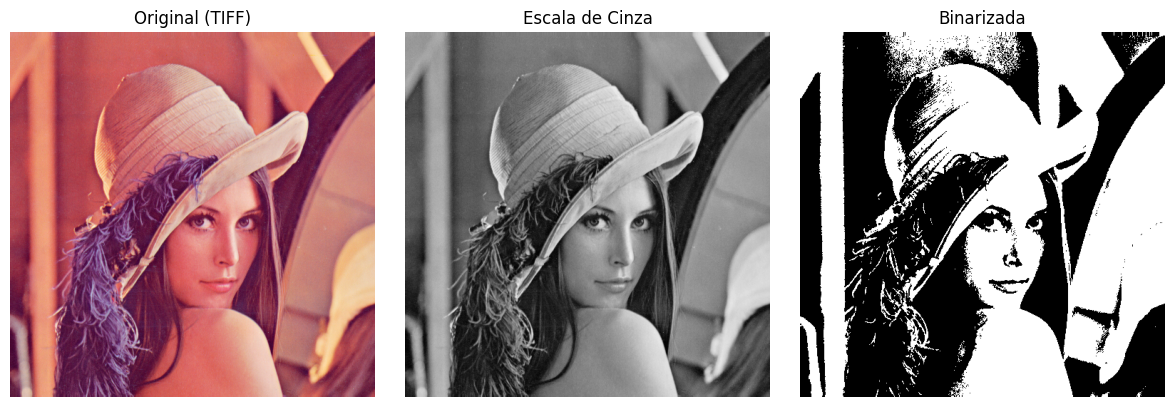

In [13]:
from PIL import Image
import matplotlib.pyplot as plt

# --- CONFIGURAÇÃO ---
formato = 'tiff'  # ou 'raw'
entrada = 'lena_color.tiff'  # ou 'lena.raw'

# Apenas para imagens RAW:
largura = 512
altura = 512
modo = 'L'  # 'L' para grayscale, 'RGB' para colorido

# --- LEITURA DA IMAGEM ---
if formato.lower() == 'tiff':
    imagem = Image.open(entrada)
elif formato.lower() == 'raw':
    with open(entrada, 'rb') as f:
        raw_data = f.read()
    if modo == 'RGB':
        pixels = list(raw_data)
        imagem = Image.new('RGB', (largura, altura))
        imagem.putdata([tuple(pixels[i:i+3]) for i in range(0, len(pixels), 3)])
    else:
        imagem = Image.new('L', (largura, altura))
        imagem.putdata(list(raw_data))
else:
    raise Exception("Formato não suportado")

# --- CONVERSÃO PARA ESCALA DE CINZA ---
imagem_cinza = imagem.convert('L')

# --- BINARIZAÇÃO ---
limiar = 127
imagem_bin = imagem_cinza.point(lambda x: 255 if x >= limiar else 0)

# --- PLOT DAS IMAGENS ---
plt.figure(figsize=(12, 4))

# Título dinâmico com o formato da imagem
titulo_original = f"Original ({formato.upper()})"

plt.subplot(1, 3, 1)
plt.imshow(imagem)
plt.title(titulo_original)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(imagem_cinza, cmap='gray')
plt.title("Escala de Cinza")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(imagem_bin, cmap='gray')
plt.title("Binarizada")
plt.axis('off')

plt.tight_layout()
plt.show()
